In [119]:
#Imports needed libraries
import rasterio
from rasterio import plot
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import os
from skimage import io, exposure

In [ ]:
#Opens the rasters
band2=rasterio.open('Subsets/B2subset.tif')
band4=rasterio.open('Subsets/B4subset.tif')

In [121]:
#Defining needed bands
green=rasterio.open('Subsets/subsetB2.tif').read(1).astype('float64')
nir=rasterio.open('Subsets/subsetB4.tif').read(1).astype('float64')

In [122]:
#Functions were taken from GEO468E_notebook.ipynb
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)
def image_histogram(img):
    """
    Plot image histogram
    Input:
    img - 2D array of uint16 type
    """
    co, ce = exposure.histogram(img)
    
    fig = plt.figure(figsize=(10, 7))
    fig.set_facecolor('white')
    plt.plot(ce[1::], co[1::])
    plt.show()
    
def image_adjust_brightness(img, limit_left, limit_right, color_map, title):
    """
    Adjust image brightness and plot the image
    Input:
    img - 2D array of uint16 type
    limit_left - integer
    limit_right - integer
    color_map - string
    title - string
    """
    img_ha = exposure.rescale_intensity(img, (limit_left, limit_right))
    
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor('cyan')
    plt.imshow(img_ha, cmap=color_map)
    plt.title(title)
    plt.colorbar()  
    plt.show()
    
    return img_ha

def image_show(img, color_map, title):
    """
    Show image
    Input:
    img - 2D array of uint16 type
    color_map - string
    title - string
    """
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor('white')
    plt.imshow(img, cmap=color_map)
    plt.title(title)
    plt.show()

def image_histogram(img):
    """
    Plot image histogram
    Input:
    img - 2D array of uint16 type
    """
    co, ce = exposure.histogram(img)
    
    fig = plt.figure(figsize=(20, 7))
    fig.set_facecolor('white')
    plt.plot(ce[1::], co[1::])
    plt.show()

In [123]:
#Calculates ndwi index
ndwi=np.where(
    (green+nir)==0., 
    0, 
    (green-nir)/(green+nir))
ndwi[:5,:5]

array([[0.01775974, 0.02652753, 0.01775974, 0.00854808, 0.01775974],
       [0.00854808, 0.00883257, 0.01775974, 0.02652753, 0.02652753],
       [0.00883257, 0.00883257, 0.02652753, 0.02652753, 0.01775974],
       [0.00854808, 0.01775974, 0.01775974, 0.00854808, 0.02652753],
       [0.02652753, 0.02652753, 0.01731871, 0.00854808, 0.00854808]])

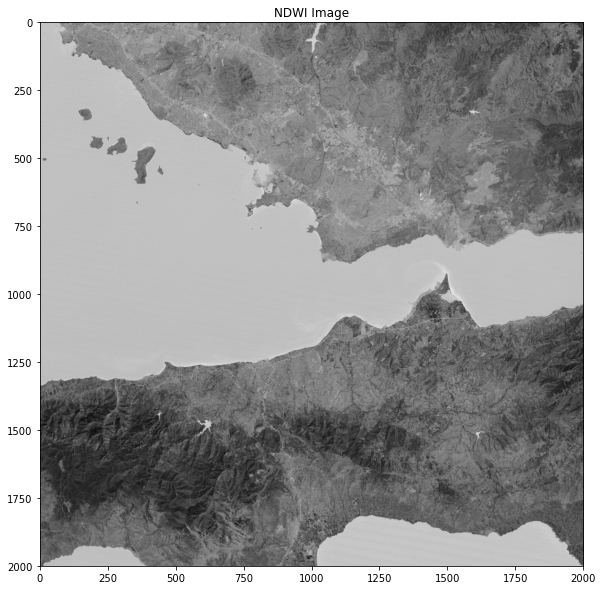

In [124]:
#Shows the results
image_show(ndwi,"gray","NDWI Image")

In [ ]:
#Exports the ndwi image
ndwi_img=rasterio.open("Outputs/NDWI.tif",'w',driver='gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndwi_img.write(ndwi,1)


In [126]:
#Closes image
ndwi_img.close()

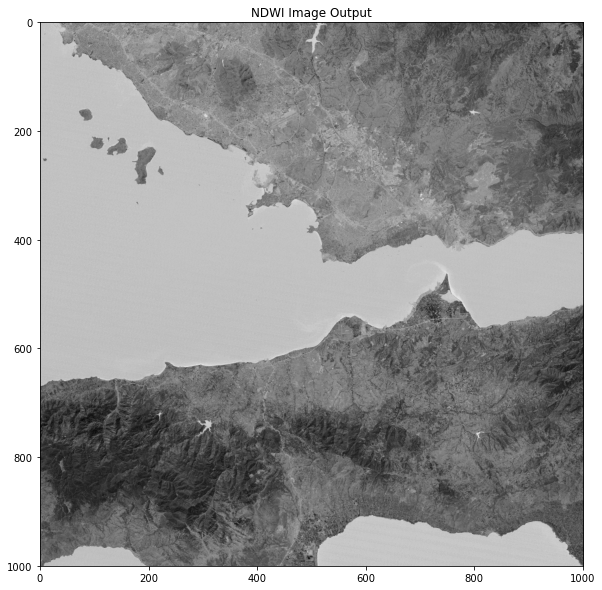

In [127]:
#Opens the exported output
ndwitif=rasterio.open('Outputs/NDWI.TIF').read(1).astype('float64')

image_show(ndwitif,"gray","NDWI Image Output")

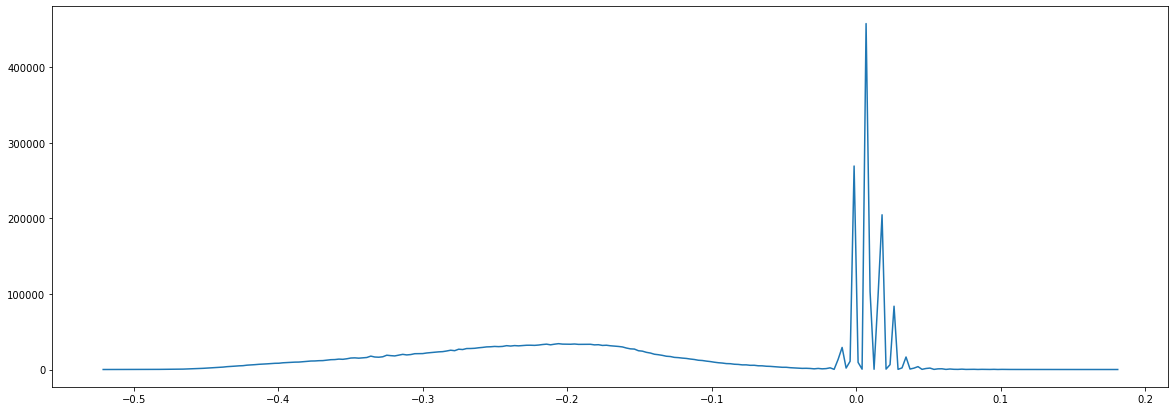

In [128]:
#Histogram
image_histogram(ndwi)